# Basic Coins / Stock / Forex Visualization 
1. Read The Data
2. Check Missing Values
3. Visualize 
    1. Simple Moving Average (SMA)    
    2. Bollinger Bands (BB)

# Read The Data

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
df = pd.read_csv('../../DATA/kaggle/btc-price/main.csv')
df['Open Time'] = df['Open Time'] // 1000
df['Open Time'] = df['Open Time'].apply(datetime.fromtimestamp)
df['Close Time'] = df['Close Time'] // 1000
df['Close Time'] = df['Close Time'].apply(datetime.fromtimestamp)
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,2021-01-01 08:00:00,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 08:00:59,7.943820e+05,1292,16.777195,485390.826825
1,2021-01-01 08:01:00,28961.67,29017.50,28961.01,29009.91,58.477501,2021-01-01 08:01:59,1.695803e+06,1651,33.733818,978176.468202
2,2021-01-01 08:02:00,29009.54,29016.71,28973.58,28989.30,42.470329,2021-01-01 08:02:59,1.231359e+06,986,13.247444,384076.854453
3,2021-01-01 08:03:00,28989.68,28999.85,28972.33,28982.69,30.360677,2021-01-01 08:03:59,8.800168e+05,959,9.456028,274083.075142
4,2021-01-01 08:04:00,28982.67,28995.93,28971.80,28975.65,24.124339,2021-01-01 08:04:59,6.992262e+05,726,6.814644,197519.374888


# Check missing values

In [2]:
#df.count()
df.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
dtype: int64

# Visualize The Data

Text(0.5, 1.0, 'BTC Price 2021/01/01(1minute timeframe)')

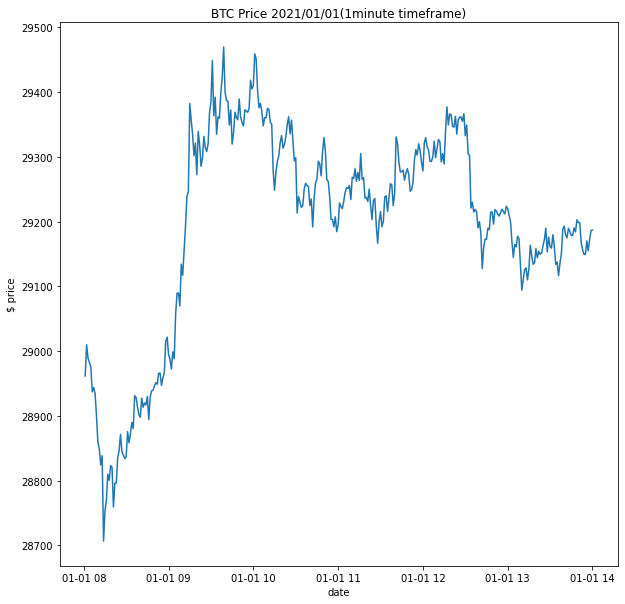

In [3]:
import matplotlib.pyplot as plt
# Volume Plain plot
df = df[:360]
plt.figure(figsize=(10,10))
plt.plot(df['Close Time'], df['Close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("BTC Price 2021/01/01(1minute timeframe)")

**Only take 360 first instances**

## Calculate Simple Moving Average 

Moving average 5,20,50,200 are the most commonly use in technical analysis

In [4]:
df['SMA1'] = df['Close'].rolling(window=20).mean()
df['SMA2'] = df['Close'].rolling(window=50).mean()
#df['SMA'].head(10)

**Plot the moving averange**

Show

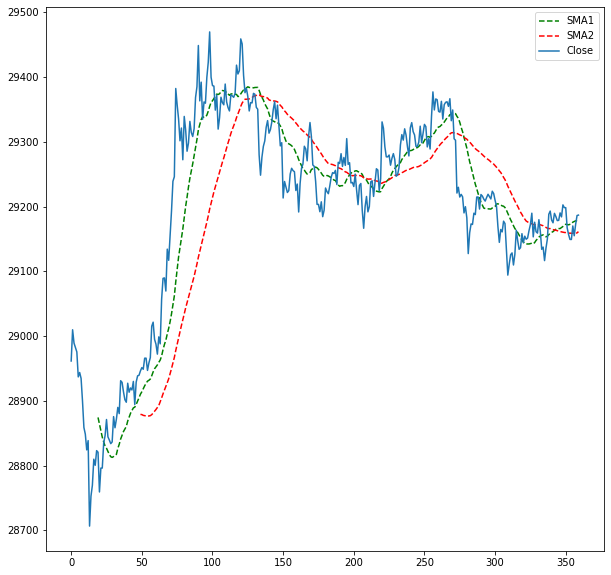

In [5]:
plt.figure(figsize=(10,10))
plt.plot(df['SMA1'],'g--',label="SMA1")
plt.plot(df["SMA2"], 'r--', label="SMA2")
plt.plot(df["Close"], label="Close")
plt.legend()
plt.show()

**We can see some golden cross and death cross**

## Calculate Bollinger Bands Indicator 

More detail about [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

In [6]:
df['middle_band'] = df['Close'].rolling(window=20).mean()
df['upper_band'] = df['Close'].rolling(window=20).mean() + df['Close'].rolling(window=20).std()*2
df['lower_band'] = df['Close'].rolling(window=20).mean() - df['Close'].rolling(window=20).std()*2

### shows Bollinger Bands

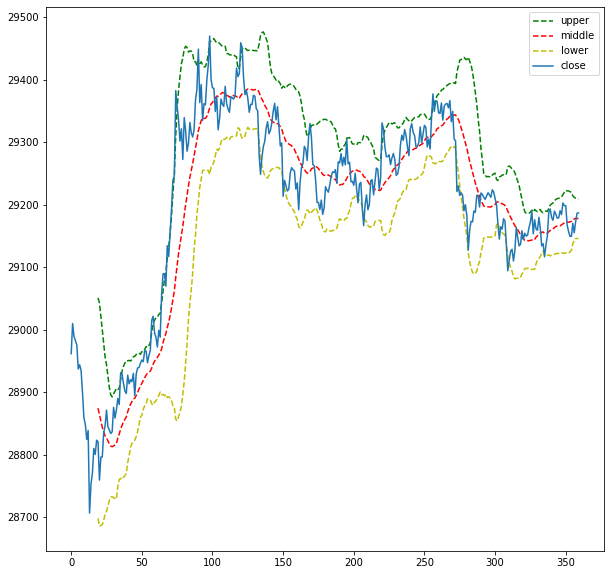

In [7]:
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'g--', label="upper")
plt.plot(df['middle_band'], 'r--', label="middle")
plt.plot(df['lower_band'], 'y--', label="lower")
plt.plot(df['Close'], label="close")
plt.legend()
plt.show()

*Thank you for your attention. *